### Metrics two -- Average Reading Duration

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [5]:
df.action.value_counts()

view      3260
enroll     814
Name: action, dtype: int64

In [7]:
view = df.query('action == "view"')

In [9]:
view.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


### Group by the reading times

In [11]:
reading_times = view.groupby(['id', 'group'])['duration'].mean()

In [16]:
reading_times = reading_times.reset_index()  # we reset the index, instead of using series

In [18]:
reading_times.head()

,index,id,group,duration
0,0,183260,control,107.331484
1,1,183615,experiment,24.627594
2,2,184277,experiment,193.212489
3,3,184360,experiment,226.586283
4,4,184589,experiment,12.052097


### The time duration for each groups

In [19]:
control_mean = df.query('group == "control"')['duration'].mean()
experiment_mean = df.query('group == "experiment"')['duration'].mean()

control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [20]:
obs_diff = experiment_mean - control_mean

In [21]:
obs_diff

15.525098619574393

### Bootstraping

In [22]:
diffs = []

for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

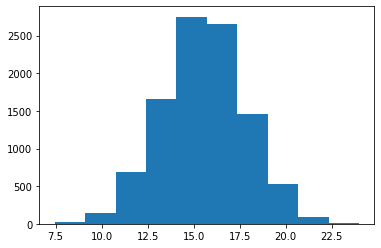

In [24]:
diffs = np.array(diffs)
plt.hist(diffs)
plt.show()

### Simulate the distribution under the NULL

In [25]:
# use the sampl
null_vals = np.random.normal(0, np.std(diffs), 10000)

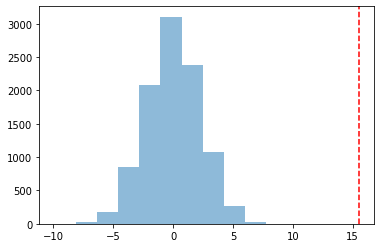

In [27]:
plt.hist(null_vals, alpha=0.5)
plt.axvline(x=obs_diff, c='r', ls='dashed')

### Conclusion

Observously, for this case the we should reject Null Hypothesis